# Proyek Analisis Data: Nama dataset
- Nama: Shafira Faira Huwaida
- Email: shafirafaira.2019@student.uny.ac.id
- Id Dicoding: shaf_faira

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
produk apa saja yang paling laku?

- pertanyaan 2
Jam berapa order tinggi?

- pertanyaan 3
Bagaimana RFM pelanggan?

- pertanyaan 4
bagaimana persebaran customer?

## Menyiapkan semua library yang dibutuhkan

In [1]:
#!pip install streamlit
#!pip install folium

In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## Data Wrangling

### Gathering Data

In [3]:
geolocation_dataset     = pd.read_csv('geolocation_dataset.csv')
order_items_dataset     = pd.read_csv('order_items_dataset.csv')
order_payments_dataset  = pd.read_csv('order_payments_dataset.csv')
order_reviews_dataset   = pd.read_csv('order_reviews_dataset.csv')
orders_dataset          = pd.read_csv('orders_dataset.csv')
product_category_name_translation   = pd.read_csv('product_category_name_translation.csv')
products_dataset        = pd.read_csv('products_dataset.csv')
sellers_dataset         = pd.read_csv('sellers_dataset.csv')
customers_dataset       = pd.read_csv('customers_dataset.csv')

In [4]:
order_items_dataset.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [5]:
order_payments_dataset.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [6]:
order_reviews_dataset.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [7]:
orders_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [8]:
product_category_name_translation.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [9]:
products_dataset.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [10]:
sellers_dataset.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [11]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

In [12]:
geolocation_dataset.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [13]:
# Sample customer data with latitude and longitude
customers_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [15]:
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [16]:
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [17]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [19]:
order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
order_reviews_dataset.describe

<bound method NDFrame.describe of                               review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title 

In [22]:
order_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Cleaning Data

In [24]:
products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
products_dataset.dropna(axis=0, inplace=True)
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [26]:
customers_dataset.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [27]:
geolocation_dataset = geolocation_dataset.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [28]:
geolocation_dataset['geolocation_lat'] = geolocation_dataset['geolocation_lat'].astype(float)
geolocation_dataset['geolocation_lng'] = geolocation_dataset['geolocation_lng'].astype(float)
geolocation_dataset = geolocation_dataset.dropna(subset=['geolocation_lat','geolocation_lng'])

### Featuring Engineer

In [29]:
# Gabungkan berdasarkan order_id
df= pd.merge(orders_dataset, order_items_dataset, on='order_id', how='inner')
df= pd.merge(df, customers_dataset, on='customer_id', how='inner')
df= pd.merge(df, products_dataset, on='product_id', how='inner')

df = pd.merge(
    df,
    geolocation_dataset,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,3.0,450.0,30.0,10.0,20.0,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,4.0,250.0,51.0,15.0,15.0,9195.0,-23.675037,-46.524784,santo andre,SP


In [30]:
#df.to_excel('df.xlsx')

## Exploratory Data Analysis (EDA)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111046 non-null  object 
 1   customer_id                    111046 non-null  object 
 2   order_status                   111046 non-null  object 
 3   order_purchase_timestamp       111046 non-null  object 
 4   order_approved_at              111032 non-null  object 
 5   order_delivered_carrier_date   109889 non-null  object 
 6   order_delivered_customer_date  108658 non-null  object 
 7   order_estimated_delivery_date  111046 non-null  object 
 8   order_item_id                  111046 non-null  int64  
 9   product_id                     111046 non-null  object 
 10  seller_id                      111046 non-null  object 
 11  shipping_limit_date            111046 non-null  object 
 12  price                         

In [32]:
df.duplicated().sum()

np.int64(0)

## Visualization & Explanatory Analysis

### pertanyaan 1 - kategori produk apa saja yang paling laku?

In [33]:
%matplotlib inline

In [34]:
df['product_category_name'].nunique()

73

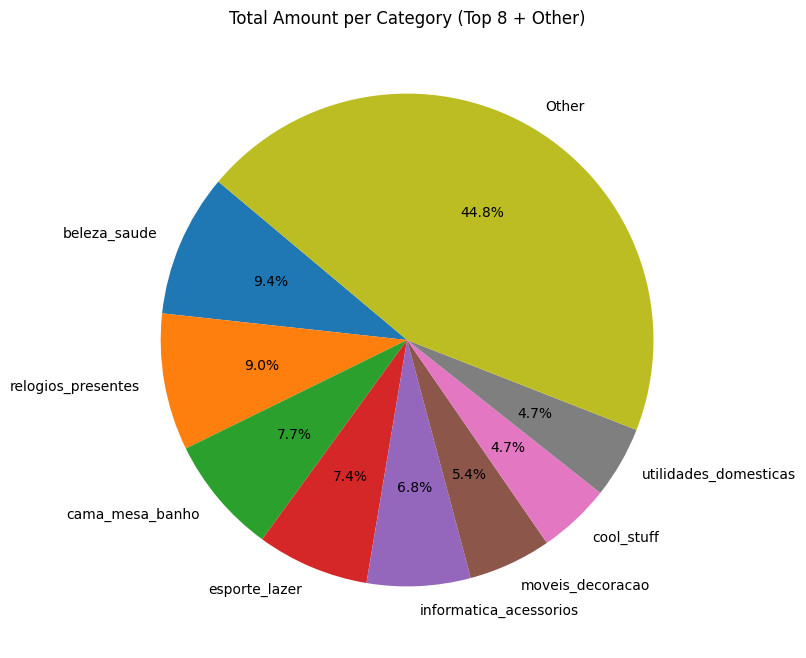

In [35]:
# Group by category lalu jumlahkan price
grouped = df.groupby('product_category_name')['price'].sum().reset_index()

# Urutkan descending
grouped = grouped.sort_values(by='price', ascending=False)

# Ambil 8 kategori teratas
top8 = grouped.head(8)

# Gabungkan sisanya jadi "Other"
other = pd.DataFrame({
    'product_category_name': ['Other'],
    'price': [grouped['price'].iloc[8:].sum()]
})

# Gabungkan top8 + other
pie_data = pd.concat([top8, other])

# Buat pie chart
plt.figure(figsize=(8,8))
plt.pie(
    pie_data['price'],
    labels=pie_data['product_category_name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Total Amount per Category (Top 8 + Other)')
plt.show()

### pertanyaan 2-Jam berapa order tinggi?

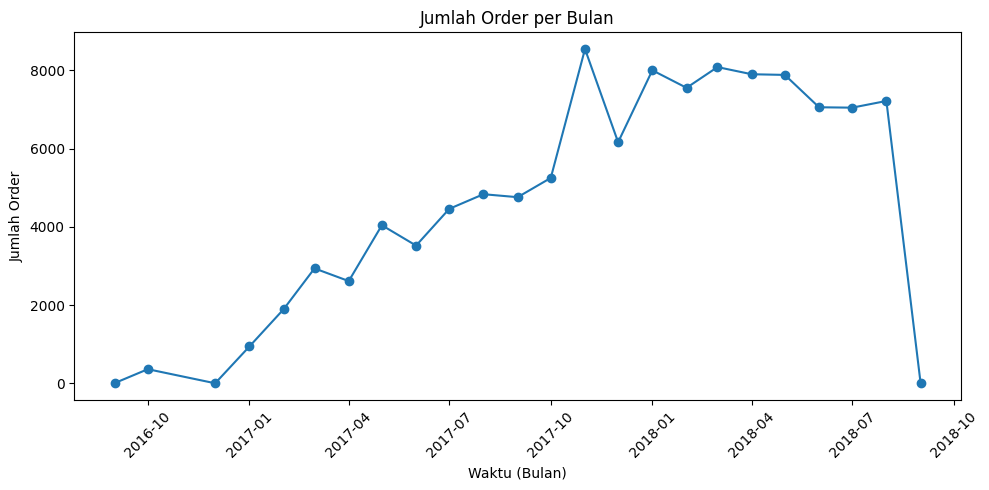

In [36]:
# Misalnya df punya kolom order_purchase_timestamp
# Pastikan kolom waktu dalam format datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Group by per bulan (bisa juga per hari atau per minggu)
orders_per_month = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['order_id'].count()

# Ubah ke DataFrame agar lebih mudah di-plot
orders_per_month = orders_per_month.reset_index()
orders_per_month['order_purchase_timestamp'] = orders_per_month['order_purchase_timestamp'].dt.to_timestamp()

# Buat grafik
plt.figure(figsize=(10,5))
plt.plot(orders_per_month['order_purchase_timestamp'], orders_per_month['order_id'], marker='o')
plt.xlabel('Waktu (Bulan)')
plt.ylabel('Jumlah Order')
plt.title('Jumlah Order per Bulan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### pertanyaan 3-Bagaimana RFM pelanggan?

In [37]:
df['customer_id'].nunique()

97276

#### Recency -> seberapa banyak waktu berkunjung belakangan/baru-baru inin pelanggan untuk membeli (pembelian yang baru menunjukkan low-recency).

In [38]:
#Group by berdasarkan customer terakhir membeli
recency_df = df.groupby(['customer_id'], as_index=False)['order_purchase_timestamp'].max()
recency_df.columns = ['customer_id','LastPurchaseDate']
recency_df.tail()

,customer_id,LastPurchaseDate
97271,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27
97272,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26
97273,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02
97274,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05
97275,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32


In [39]:
# Ambil waktu sekarang sebagai Timestamp
now = pd.Timestamp.now()
# Gabungkan kembali ke df utama atau buat dataframe baru
recency_df['Recency'] = (now - recency_df['LastPurchaseDate']).dt.days

In [40]:
recency_df['Recency'] = recency_df['Recency'].astype('Int64')
recency_df.tail()

,customer_id,LastPurchaseDate,Recency
97271,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,2891
97272,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2879
97273,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2825
97274,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,2803
97275,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,3087


In [41]:
recency_df['Recency'].describe()

count       97276.0
mean     2965.77204
std      153.404651
min          2721.0
25%          2841.0
50%          2946.0
75%          3076.0
max          3449.0
Name: Recency, dtype: Float64

#### Frecuency -> seberapa banyak/jumlah mereka melakukan pembelian (pembelian yang tinggi berarti high-frecuency)

In [42]:
# Gabungkan dengan recency_df
frequency_df = df.copy()
frequency_df.drop_duplicates(
    subset=['order_purchase_timestamp','order_id'], 
    keep='first', 
    inplace=True
)

In [43]:
# Hitung jumlah nomor resi per pelanggan
resi_count = df.groupby('customer_id', as_index=False)['order_id'].count()
resi_count.columns = ['customer_id', 'Frequency']

frequency_df = frequency_df.merge(resi_count, on='customer_id', how='left')
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

frequency_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,Frequency
86927,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,1,270516a3f41dc035aa87d220228f844c,...,800.0,21.0,4.0,15.0,5882.0,-23.683086,-46.786966,sao paulo,SP,21
85090,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-02 00:18:01,2018-03-05 15:22:27,2018-03-08 00:00:00,1,ee3d532c8a438679776d222e997606b3,...,360.0,19.0,18.0,15.0,3029.0,-23.528716,-46.620265,sao paulo,SP,20
91994,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-08-25 20:07:36,2017-09-02 12:13:03,2017-09-21 00:00:00,1,9571759451b1d780ee7c15012ea109d4,...,1400.0,20.0,31.0,30.0,74825.0,-16.717494,-49.246727,goiania,GO,20
29677,428a2f660dc84138d969ccd69a0ab6d5,10de381f8a8d23fff822753305f71cae,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-11-28 16:42:21,2017-12-13 20:19:35,2017-12-19 00:00:00,1,89b190a046022486c635022524a974a8,...,700.0,62.0,15.0,15.0,84600.0,-26.226015,-51.087969,uniao da vitoria,PR,15
65006,9ef13efd6949e4573a18964dd1bbe7f5,adb32467ecc74b53576d9d13a5a55891,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-02-01 14:34:10,2017-02-14 10:48:10,2017-03-07 00:00:00,1,37eb69aca8718e843d897aa7b82f462d,...,600.0,38.0,16.0,25.0,74885.0,-16.735303,-49.206751,goiânia,GO,15


In [44]:
link_target = "fc3d1daec319d62d49bfb5e1f83123e9" 
freq_value = frequency_df.loc[frequency_df['customer_id'] == link_target, 'Frequency'] 
freq_value


86927    21
Name: Frequency, dtype: int64

#### Monetary = seberapa banyak uang yang mereka spend untuk membeli (spend yang tinggi berarti high monetary)

In [45]:
# Gabungkan dengan recency_df

monetary_df = df.copy()
monetary_df.drop_duplicates(
    subset=['order_purchase_timestamp','order_id'], 
    keep='first', 
    inplace=True
)

In [46]:
# Hitung total price per customer
price_sum = df.groupby('customer_id', as_index=False)['price'].sum()
price_sum.columns = ['customer_id', 'Monetary']

# Gabungkan dengan df utama
monetary_df = df.merge(price_sum, on='customer_id', how='left')

# Urutkan berdasarkan kolom 'Monetary'
monetary_df = monetary_df.sort_values(by='Monetary', ascending=False)

# Tampilkan hasil
monetary_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,Monetary
14846,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,5,5769ef0a239114ac3a854af00df129e4,...,750.0,16.0,16.0,16.0,20080.0,-22.901095,-43.182559,rio de janeiro,RJ,13440.0
14845,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,4,5769ef0a239114ac3a854af00df129e4,...,750.0,16.0,16.0,16.0,20080.0,-22.901095,-43.182559,rio de janeiro,RJ,13440.0
14842,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,1,5769ef0a239114ac3a854af00df129e4,...,750.0,16.0,16.0,16.0,20080.0,-22.901095,-43.182559,rio de janeiro,RJ,13440.0
14844,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,3,5769ef0a239114ac3a854af00df129e4,...,750.0,16.0,16.0,16.0,20080.0,-22.901095,-43.182559,rio de janeiro,RJ,13440.0
14843,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,2,5769ef0a239114ac3a854af00df129e4,...,750.0,16.0,16.0,16.0,20080.0,-22.901095,-43.182559,rio de janeiro,RJ,13440.0


In [47]:
#Merging above tables
rf = recency_df.merge(frequency_df , left_on = 'customer_id', right_on = 'customer_id')
rfm = rf.merge(monetary_df , left_on = 'customer_id', right_on = 'customer_id' )
rfm.set_index('customer_id' , inplace = True)


In [48]:
rfm[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,111046.0,111046.000000,111046.000000
mean,2965.662455,1.395314,153.130794
std,153.14644,1.120682,257.624210
min,2721.0,1.000000,0.850000
25%,2842.0,1.000000,49.000000
50%,2946.0,1.000000,91.290000
75%,3075.0,1.000000,165.900000
max,3449.0,21.000000,13440.000000


In [49]:
rfm.tail()

,LastPurchaseDate,Recency,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,order_item_id_x,...,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,geolocation_zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y,Monetary
customer_id,,,,,,,,,,,,,,,,,,,,,
fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2879,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00,1,...,2050.0,50.0,10.0,40.0,95630.0,-29.634961,-50.842244,parobe,RS,54.9
fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2825,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29 00:00:00,1,...,350.0,20.0,30.0,20.0,22461.0,-22.960710,-43.213958,rio de janeiro,RJ,47.9
ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,2803,83b5fc912b2862c5046555ded1483ae9,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25 00:00:00,1,...,2700.0,41.0,8.0,36.0,6754.0,-23.605236,-46.762164,taboao da serra,SP,199.9
ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,3087,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26 00:00:00,1,...,200.0,20.0,20.0,20.0,37130.0,-21.422889,-45.946367,alfenas,MG,21.8
ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,3087,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26 00:00:00,1,...,200.0,20.0,20.0,20.0,37130.0,-21.422889,-45.946367,alfenas,MG,21.8


In [50]:
# Hapus baris dengan MOnetary = 0
rfm = rfm[rfm['Monetary'] != 0]

# Tampilkan hasil
rfm.tail()

,LastPurchaseDate,Recency,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,order_item_id_x,...,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,geolocation_zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y,Monetary
customer_id,,,,,,,,,,,,,,,,,,,,,
fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2879,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00,1,...,2050.0,50.0,10.0,40.0,95630.0,-29.634961,-50.842244,parobe,RS,54.9
fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2825,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29 00:00:00,1,...,350.0,20.0,30.0,20.0,22461.0,-22.960710,-43.213958,rio de janeiro,RJ,47.9
ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,2803,83b5fc912b2862c5046555ded1483ae9,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25 00:00:00,1,...,2700.0,41.0,8.0,36.0,6754.0,-23.605236,-46.762164,taboao da serra,SP,199.9
ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,3087,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26 00:00:00,1,...,200.0,20.0,20.0,20.0,37130.0,-21.422889,-45.946367,alfenas,MG,21.8
ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,3087,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26 00:00:00,1,...,200.0,20.0,20.0,20.0,37130.0,-21.422889,-45.946367,alfenas,MG,21.8


Recency
<br>-Sangat baru (≤2800)<br>- Baru (2801–3000)<br>- Lama (3001–3200)<br>- Sangat lama (>3200)


Frequency
<br>- Sangat jarang (≤5)<br>- Jarang (6–10)<br>- Sering (11–15)<br>- Sangat sering (>15)


Monetary
<br>-  Rendah (≤500)<br>- Sedang (501–2000)<br>- Tinggi (2001–5000)<br>- Sangat tinggi (>5000)


In [51]:
# Recency
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

rfm['F'] = pd.cut(
    rfm['Frequency'],
    bins=[0, 5, 10, 15, rfm['Frequency'].max()],
    labels=[1,2,3,4]
)

rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

In [52]:
# Hapus baris jika kolom 'R' kosong
rfm = rfm.dropna(subset=['R'])

In [53]:
rfm['Score'] = rfm[['R','F','M']].sum(axis=1)

In [54]:
rfm.shape

(111046, 68)

In [55]:
rfm.head()

,LastPurchaseDate,Recency,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,order_item_id_x,...,geolocation_zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y,Monetary,R,F,M,Score
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,3014,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00,1,...,6273.0,-23.499689,-46.766901,osasco,SP,89.80,2,1,2,5
000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,3135,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00,1,...,35550.0,-20.470582,-45.108716,itapecerica,MG,54.90,1,1,2,4
0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,3273,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00,1,...,29830.0,-18.716793,-40.397969,nova venecia,ES,179.99,1,1,4,6
0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,3104,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00,1,...,39664.0,-21.770599,-43.355230,mendonca,MG,149.90,1,1,3,5
000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,2875,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00,1,...,4841.0,-23.741140,-46.690509,sao paulo,SP,93.00,3,1,3,7


In [56]:
def categorize(score):
    if score >= 10:
        return 'Champions'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 4:
        return 'Potential Loyalists / At Risk'
    else:
        return 'Hibernating / Lost'

rfm['Segment'] = rfm['Score'].apply(categorize)

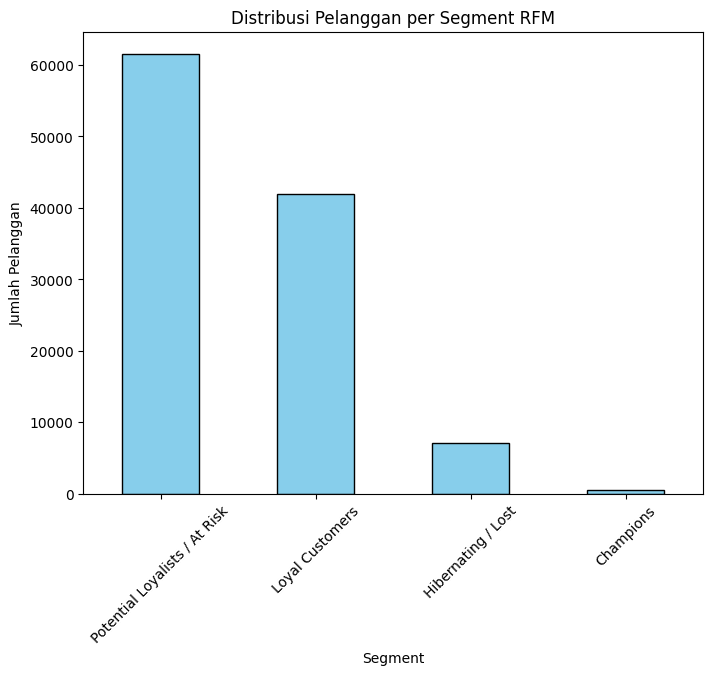

In [57]:
# Hitung jumlah pelanggan per segmen
segment_counts = rfm['Segment'].value_counts()

# Buat barchart
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Pelanggan per Segment RFM')
plt.xticks(rotation=45)
plt.show()

### pertanyaan 4-bagaimana persebaran customer?

In [ ]:
# Tentukan titik tengah (misalnya rata-rata koordinat)
center_lat = df['geolocation_lat'].mean()
center_lon = df['geolocation_lng'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Tambahkan marker untuk setiap customer
df_clean = df.dropna(subset=['geolocation_lat', 'geolocation_lng'])

for _, row in df_clean.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f"Customer: {row['customer_id']}<br>Kota: {row['geolocation_city']}",
        icon=folium.Icon(color="blue", icon="user")
    ).add_to(m)

m

In [2]:
#!pip install jupyter